In [80]:
import pandas as pd
import datetime 
import pandasql as ps
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Exploratory Data Analysis (EDA)
This file consists of following parts (w/o condition):  
1) Count of non-missing observations  
2) Statistical summary (min, max, mean, median, std, 1.5/3.0 IQR)  
3) Figures: distribution, boxplot with 1.5/3.0 cutoff

### Count

In [19]:
DIR_FILE = 'NUYou/raw/NUYou_by_day_data_full.csv' 
df = pd.read_csv(DIR_FILE)

# only real participant in the study
# rule(NUYou): study ID is 4-digit number
df_valid = df[df.study_id.apply(lambda x: len(str(x)) == 4 and x.isdigit())]
list(df_valid) # fields

['user_id',
 'study_id',
 'ethnicity',
 'gender',
 'races',
 'arms_populations',
 'app_date',
 'app_weight',
 'app_fat',
 'app_carbs',
 'app_protein',
 'app_cholesterol',
 'app_calories',
 'app_sodium',
 'app_medium_fruit',
 'app_leafy',
 'app_dried_fruit',
 'app_canned',
 'app_juice',
 'app_fv_total',
 'app_num_smoked',
 'app_self_report_activity_mins',
 'app_steps',
 'app_veryActiveMinutes',
 'app_lightlyActiveMinutes',
 'app_fairlyActiveMinutes',
 'app_sedentaryMinutes']

In [45]:
# count of records by participant
# w/o condition: by different preliminary outcomes

# merge upload and item (sql)
sql_query = 'select study_id as study_id,'
col_interest = ['app_weight',
                'app_fat',
                'app_carbs',
                'app_protein',
                'app_cholesterol',
                'app_calories',
                'app_sodium',
                'app_medium_fruit',
                'app_leafy',
                'app_dried_fruit',
                'app_canned',
                'app_juice',
                'app_fv_total',
                'app_num_smoked',
                'app_self_report_activity_mins',
                'app_steps',
                'app_veryActiveMinutes',
                'app_lightlyActiveMinutes',
                'app_fairlyActiveMinutes',
                'app_sedentaryMinutes']

for each in col_interest:
    sql_query = sql_query + 'count(' + each + ') as ' + each + ','

sql_query = sql_query + 'count(*) as count_all from df_valid group by study_id'

df_test = ps.sqldf(sql_query)

# save locally
df_test.to_csv('NUYou/EDA/count_outcome.csv', index=False)

### Statistical Summary

In [109]:
# by participant and outcome
def Stats(df, column):
    ID_list = list(set(df['study_id'])) 
    stats = []
    for each_id in ID_list:
        df_user = df[df['study_id'] == each_id]

        l_temp = list(df_user[column])
        l = [x for x in l_temp if str(x) != 'nan']
        if(len(l) != 0):
            Max = np.max(l)
            Min = np.min(l)
            Mean = np.mean(l)
            Median = np.median(l)
            STD = np.std(l)

            #outlier percentage
            q1 = np.percentile(l, 25)  
            q3 = np.percentile(l, 75)
            IQR = q3-q1
            low = q1 - 1.5*IQR
            high = q3+1.5*IQR

            outliersPercent = len([i for i in l if i < low or i > high]) / len(l)
            stats.append([each_id, Min, Max, Mean, Median, STD, outliersPercent])
        else:
            stats.append([each_id, 999999,999999,999999,999999,999999,999999])
    
    df_result = pd.DataFrame(stats, columns=['study_id', 'min','max','mean','median','std','outlier_percentage'])
    df_result = df_result.sort_values(by='study_id', ascending=True)
    return(df_result)

# by outcome
def Stats_2(df, column_list):
    stats = []
    for each_outcome in column_list:      
        l_temp = list(df[each_outcome])
        l = [x for x in l_temp if str(x) != 'nan']
        if(len(l) != 0):
            Max = np.max(l)
            Min = np.min(l)
            Mean = np.mean(l)
            Median = np.median(l)
            STD = np.std(l)

            #outlier percentage
            q1 = np.percentile(l, 25)  
            q3 = np.percentile(l, 75)
            IQR = q3-q1
            low = q1 - 1.5*IQR
            high = q3+1.5*IQR
            outliersPercent = len([i for i in l if i < low or i > high]) / len(l)
            stats.append([each_outcome, Min, Max, Mean, Median, STD, outliersPercent])

        else:
            stats.append([each_outcome, 999999,999999,999999,999999,999999,999999])
            
    df_result = pd.DataFrame(stats, columns=['outcome', 'min','max','mean','median','std','outlier_percentage'])
    return(df_result)

def outlier(df, column):
    l_temp = list(df[column])
    l = [x for x in l_temp if str(x) != 'nan']
    #outlier percentage
    q1 = np.percentile(l, 25)  
    q3 = np.percentile(l, 75)
    IQR = q3-q1
    low_1 = q1 - 1.5*IQR
    high_1 = q3+1.5*IQR
    
    return(low_1, high_1)

In [74]:
# by outcome only
save_dir = 'NUYou/EDA/stats_outcome.csv'
Stats_2(df_valid, col_interest).to_csv(save_dir, index=False)

In [68]:
# by outcome by participant
for each in col_interest:
    df_temp = Stats(df_valid, each)
    save_dir = 'NUYou/EDA/outcome/' + each + '.csv'
    df_temp.to_csv(save_dir, index=False)

### Figures: distribution/boxplot 

C:\Users\mrwby\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


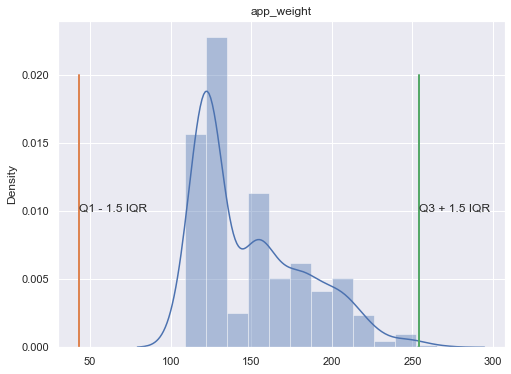

C:\Users\mrwby\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


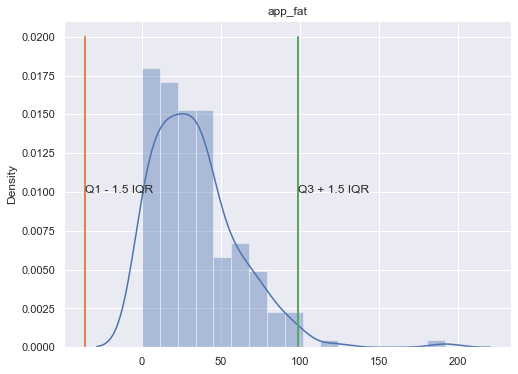

C:\Users\mrwby\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


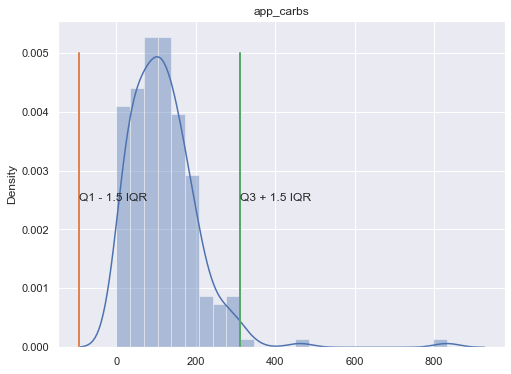

C:\Users\mrwby\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


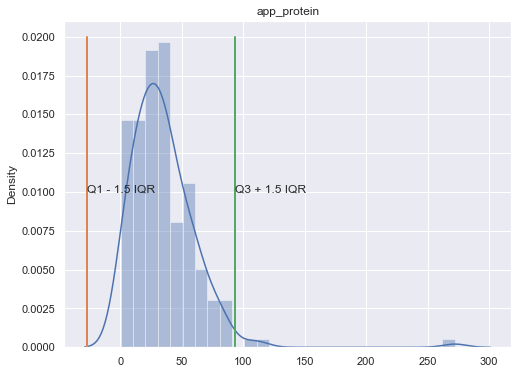

C:\Users\mrwby\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


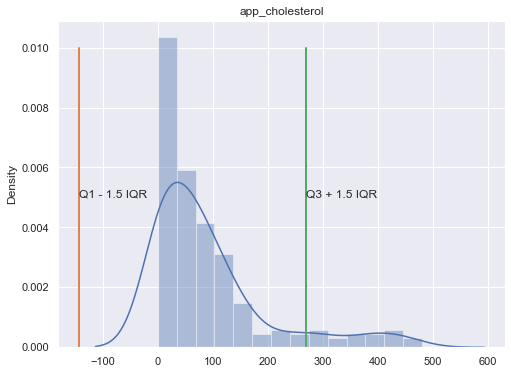

C:\Users\mrwby\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


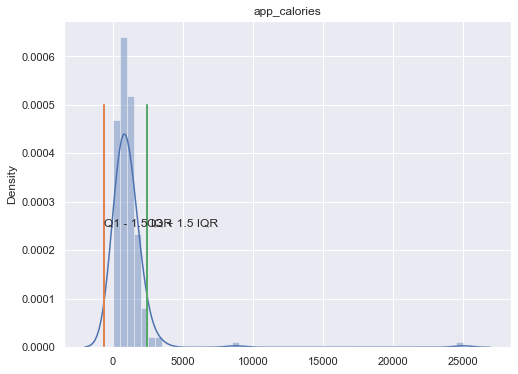

C:\Users\mrwby\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


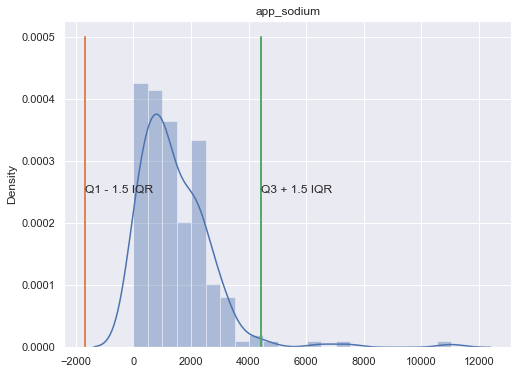

C:\Users\mrwby\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


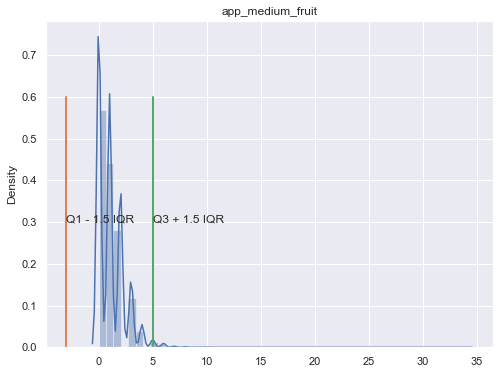

C:\Users\mrwby\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


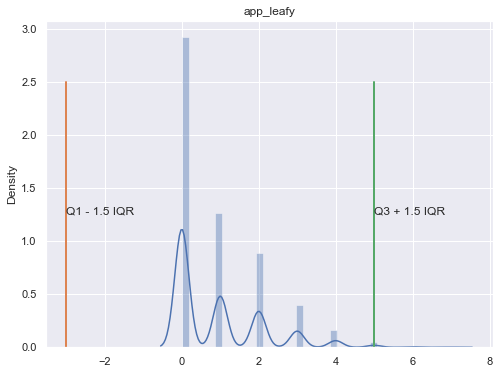

C:\Users\mrwby\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


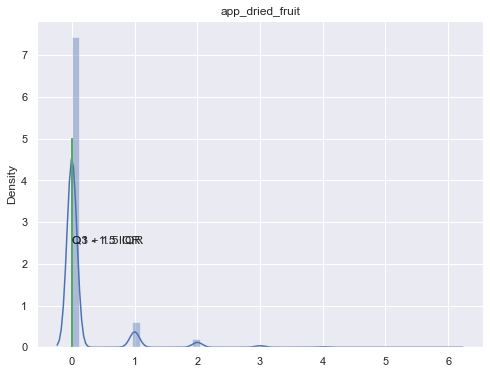

C:\Users\mrwby\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


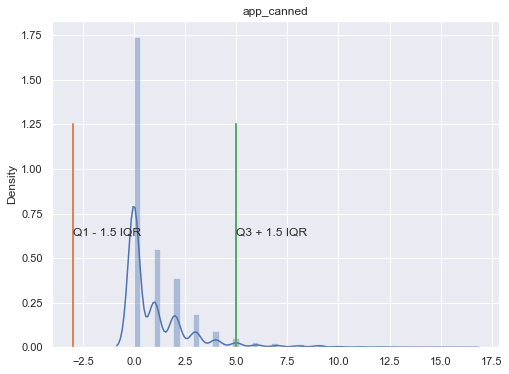

C:\Users\mrwby\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


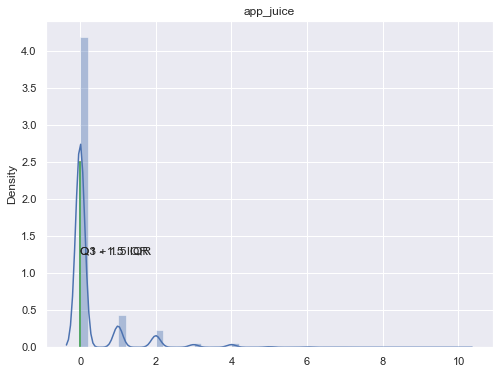

C:\Users\mrwby\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


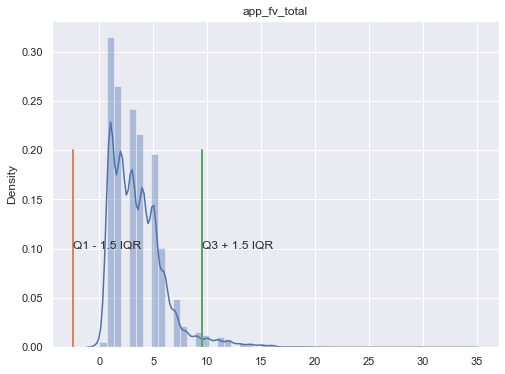

C:\Users\mrwby\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


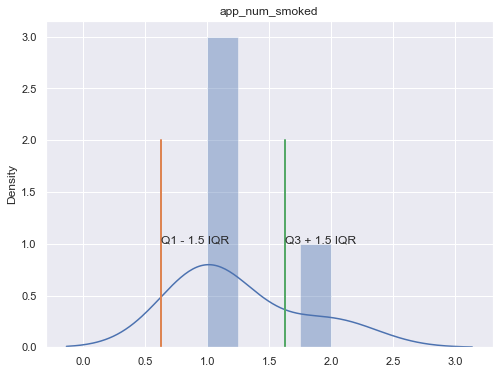

C:\Users\mrwby\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


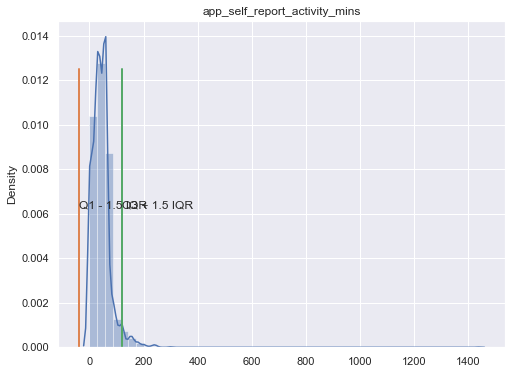

C:\Users\mrwby\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


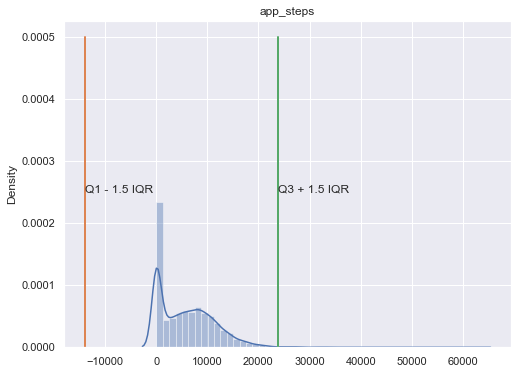

C:\Users\mrwby\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


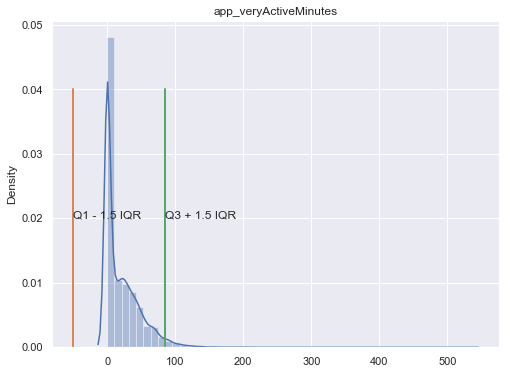

C:\Users\mrwby\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


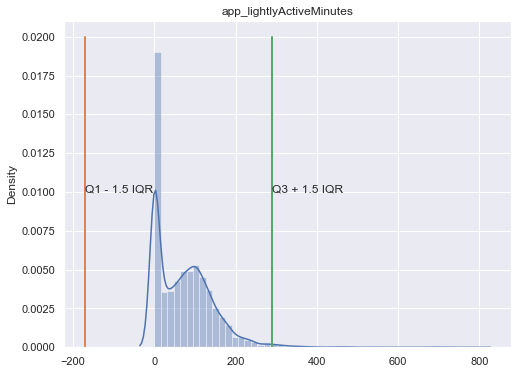

C:\Users\mrwby\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


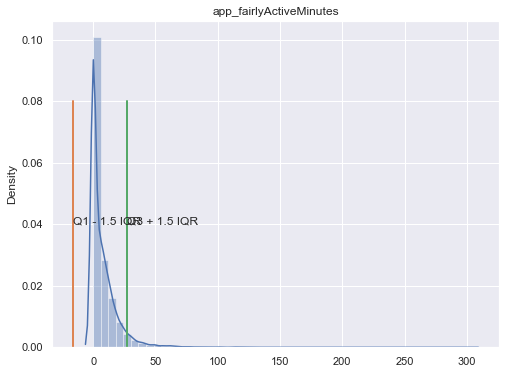

C:\Users\mrwby\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


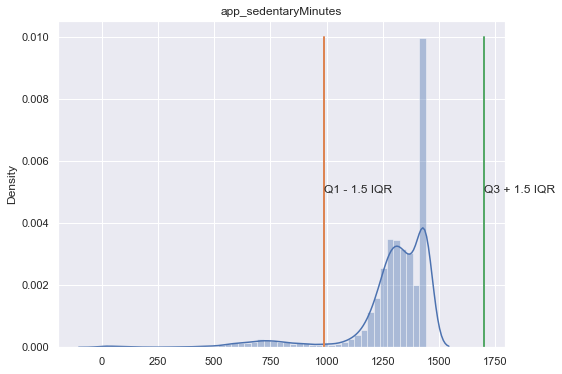

In [116]:
height_list = [0.02,0.02,0.005,0.02,0.01,0.0005,0.0005,0.6,2.5,5,1.25,2.5,0.2,2.0,0.0125,0.0005,0.04,0.02,0.08,0.01]
sns.set(rc={'figure.figsize':(8,6)})
for i in range(len(col_interest)):
    save_dir = 'NUYou/EDA/outcome_fig/' + col_interest[i] + '.png'
    ax = sns.distplot(list(df_valid[col_interest[i]]))
    ax.set_title(col_interest[i])
    low, high = outlier(df_valid, col_interest[i])
    plt.plot([low, low], [0, height_list[i]], linewidth=2)
    plt.plot([high, high], [0, height_list[i]], linewidth=2)
    plt.text(low, height_list[i]/2, "Q1 - 1.5 IQR")
    plt.text(high, height_list[i]/2, "Q3 + 1.5 IQR")
    plt.savefig(save_dir)
    plt.show()